# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Configurando display do pandas
pd.set_option("display.max_columns", None)

In [3]:
# Importando a base tratada
caminho = r"C:\Users\Valdir D. Pereira\Documents\projetos\arvores1_ EBAC\base_tratada.csv"
df = pd.read_csv(caminho)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo_F                                  16650 non-null  int64  
 10  sexo_M                                  16650 non-null  in

In [5]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,tipo_renda_Commercial associate,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Academic degree,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Civil marriage,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [6]:
# Separando variáveis independentes da target
y = df["mau"]
X = df.drop("mau", axis=1)

In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [8]:
X.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co-op apartment', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      

In [9]:
# Dividindo dados entre conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Validando a proporção
prop_train = 100*(X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))
prop_test = 100 - prop_train
print(f"Para X proporção de treino e teste, em relação ao conjunto original é, respectivamente: {prop_train}% e {prop_test}%.") 

Para X proporção de treino e teste, em relação ao conjunto original é, respectivamente: 70.0% e 30.0%.


In [11]:
prop_train = 100*(y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))
prop_test = 100 - prop_train
print(f"Para y proporção de treino e teste, em relação ao conjunto original é, respectivamente: {prop_train}% e {prop_test}%.") 

Para y proporção de treino e teste, em relação ao conjunto original é, respectivamente: 70.0% e 30.0%.


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
# Definindo o objeto do classificador
clf = DecisionTreeClassifier(random_state=100)

In [13]:
# Treinando o classificador
clf = clf.fit(X_train, y_train)

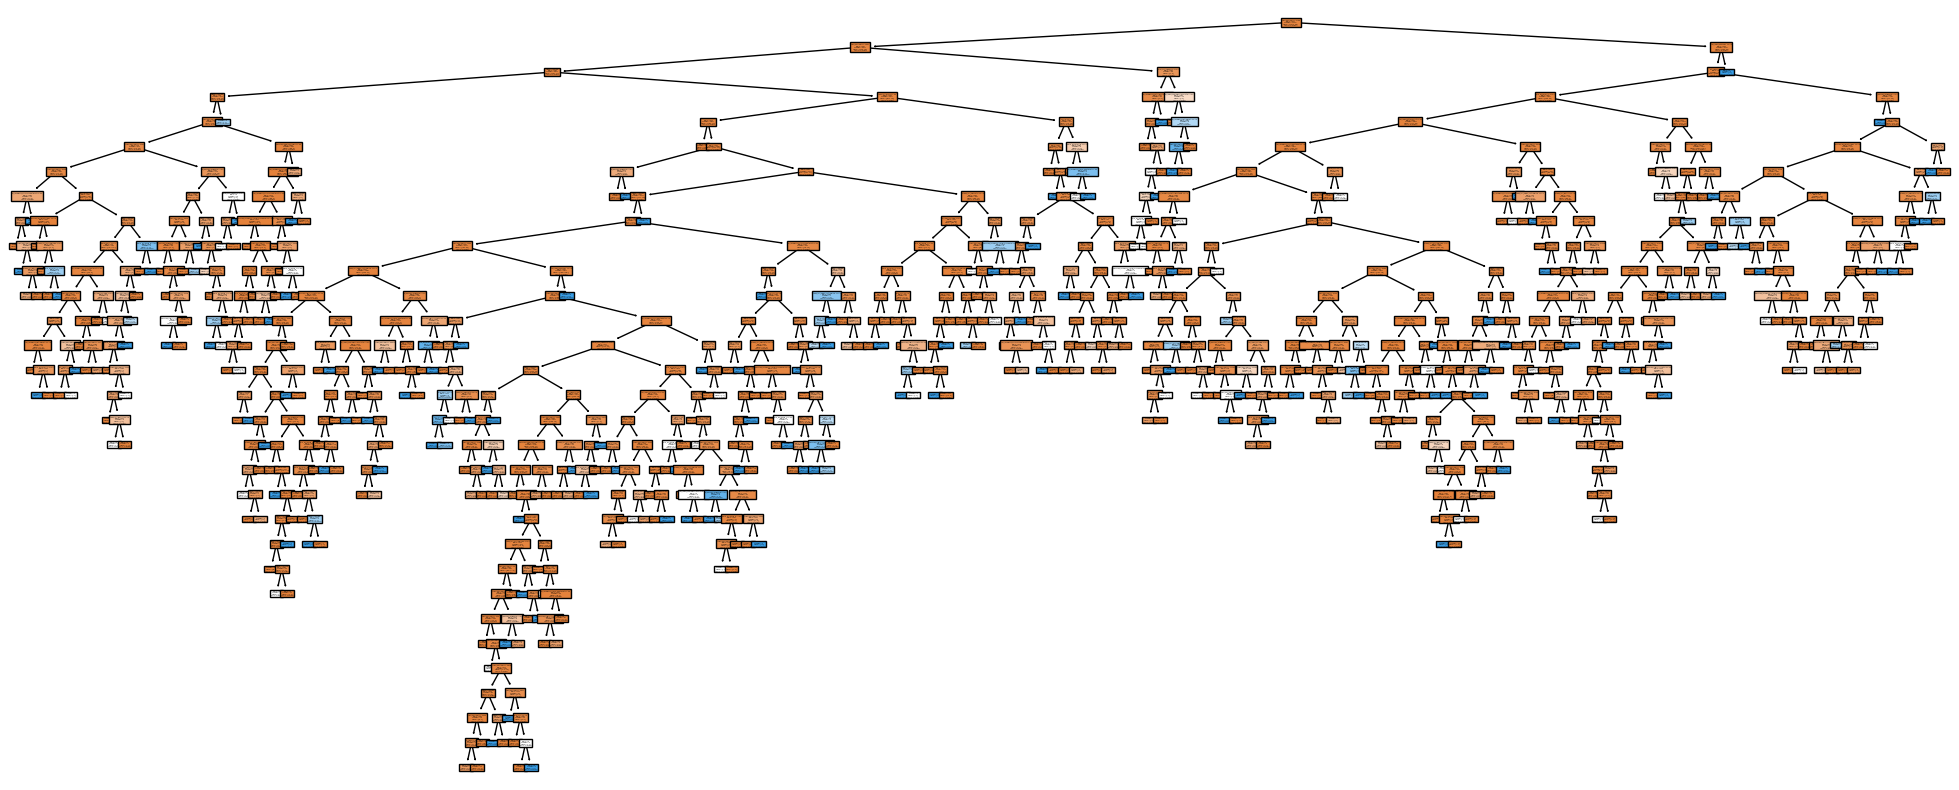

In [14]:
# Visualizando a árvore criada
plt.figure(figsize=(25,10))
plot_tree(clf, feature_names=X_train.columns, class_names=["Aprovado", "Reprovado"], filled=True)
plt.show()

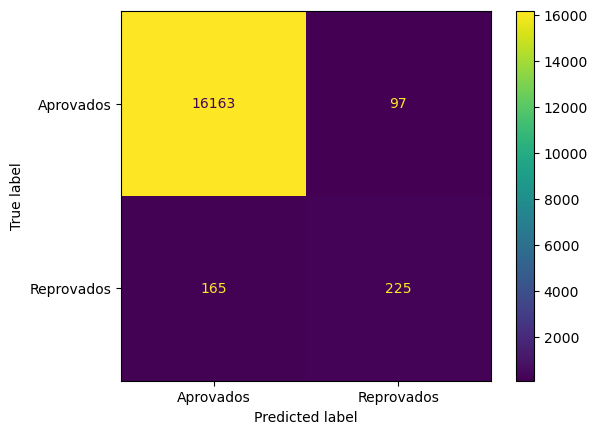

In [15]:
# Matriz de Confusão
metrics.ConfusionMatrixDisplay.from_estimator(clf, X, y, display_labels=["Aprovados", "Reprovados"])

In [16]:
# Acurácia do modelo
acuracia = clf.score(X_train, y_train)
print(f"A acurácia do modelo é de {100*acuracia}%.")

A acurácia do modelo é de 99.12483912483913%.


Vale ressaltar que, a fim de seguir à risca o que fora pedido no enunciado dessa tarefa, a matriz de confusão e o cálculo da acurácia do classificador não estão calculados sobre os dados de treino, como deveria ser num processo comum de modelagem.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [17]:
# Valores preditos da base de teste
y_pred = clf.predict(X_train)

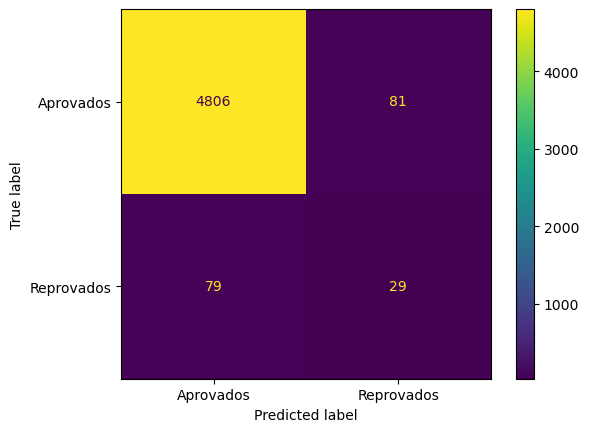

In [18]:
# Matriz de Confusão da base de teste
metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Aprovados", "Reprovados"])


In [19]:
# Calculando e comparando a acurácia de teste
acuracia_teste = clf.score(X_test, y_test)
print(f"A acurácia de teste é igual a {acuracia_teste*100:.2f}%, enquanto a acurácia do treinamento foi de {100*acuracia:.2f}%")
print(f"A precisão sobre o conjunto de testes é {100*abs(acuracia_teste-acuracia):.2f} pontos percentuais menor que a de treinamento.")

A acurácia de teste é igual a 96.80%, enquanto a acurácia do treinamento foi de 99.12%
A precisão sobre o conjunto de testes é 2.33 pontos percentuais menor que a de treinamento.


### Árvore 2

In [20]:
# Criando uma nova árvore
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

In [21]:
# Treinando nova árvore
clf2 = clf2.fit(X_train, y_train)

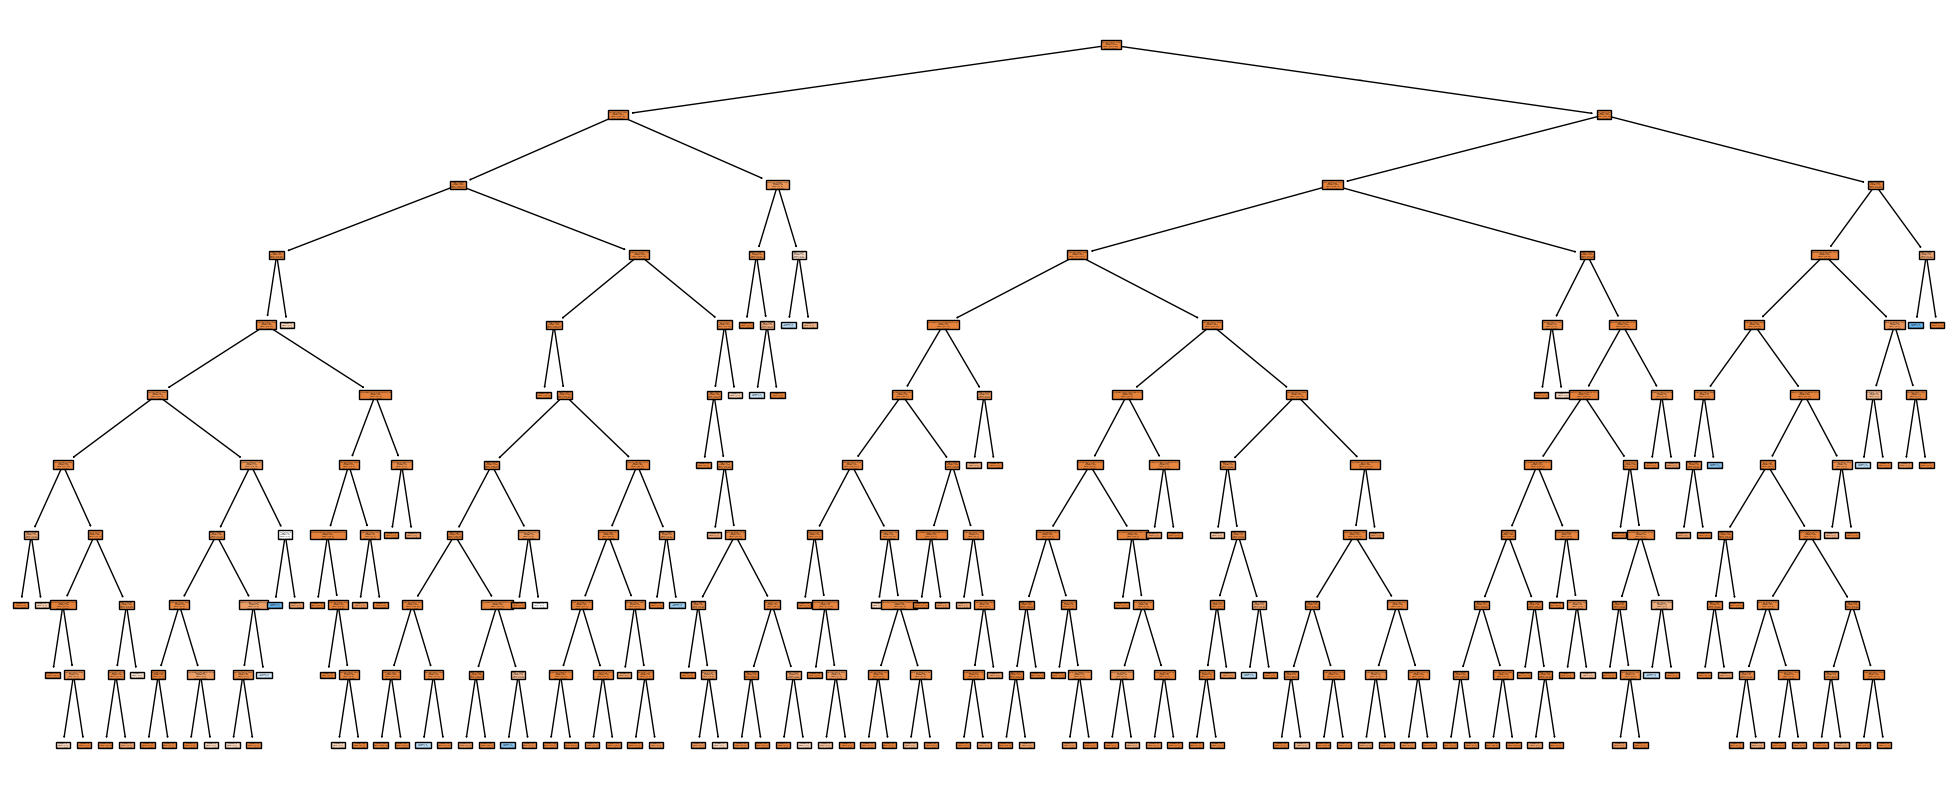

In [22]:
# Visualizando a nova árvore
plt.figure(figsize=(25,10))
plot_tree(clf2, filled=True, feature_names=X_train.columns, class_names=["Aprovados", "Reprovados"])
plt.show()

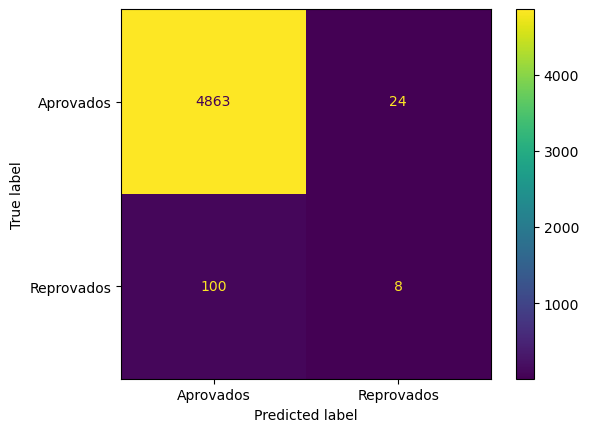

In [23]:
# Matriz de Confusão
metrics.ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, display_labels=["Aprovados", "Reprovados"])

In [24]:
# Valores preditos
y_pred = clf2.predict(X_train)
valores, frequencias = np.unique(y_pred, return_counts=True)

In [25]:
resultados = dict(zip(valores, frequencias))
resultados

{0: 11584, 1: 71}

In [26]:
prop = resultados[1]/(resultados[0] + resultados[1])
print(f"O modelo reprovou (classificou como mau pagador) o seguinte percentual do conjunto de teste: {100*prop:.2f}%")

O modelo reprovou (classificou como mau pagador) o seguinte percentual do conjunto de teste: 0.61%


In [38]:
freq_abs = pd.Series(y_pred).value_counts().reset_index(drop=True)
freq = pd.Series(y_pred).value_counts(normalize=True).reset_index(drop=True)
freq = round(freq*100,2)
freq = freq.astype("str") +"%"
tab = pd.concat([freq_abs, freq], axis=1)
tab.columns = ["Frequência absoluta", "Frequência relativa"]

In [39]:
tab

,Frequência absoluta,Frequência relativa
0,11584,99.39%
1,71,0.61%


Classificando todos os valores como bons e recalculando a acurácia:
1. Calculando a proporção de bons pagadores (mau=0) no conjunto de teste de y; mostra o percentual que teríamos de acerto se todos os dados de previsão fossem classificados dessa maneira.
2. Para testar, a partir de y_test, criaremos um segundo vetor só com valores de bons pagadores (mau=0), e utilizaremos a função de accuracy_score

In [45]:
# 1. Verificando proporção
y_test.value_counts(normalize=True)

mau
0    0.978378
1    0.021622
Name: proportion, dtype: float64

In [46]:
# Criando o vetor só com zeros
y_bons = np.zeros(y_test.shape)
metrics.accuracy_score(y_test, y_bons)

0.9783783783783784

Pronto! Temos que a acurácia seria de aproximadamente 97.84%, caso simplesmente classificássemos todos os clientes como bons pagadores!